In [13]:
# Logistic Regression
import pandas as pd
import numpy as np

In [ ]:
# Sigmoid Funtion
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

In [ ]:
# Inilializing parameters
def initialize_weights(n_features):
    weights = np.zeros((n_features, 1))
    bias = 0
    return weights, bias

In [6]:
# Prediction
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    return y_pred

In [7]:
# Computing Loss: Log-Loss
def compute_loss(y_true, y_pred):
    n = y_true.shape[0] # Number of rows
    loss = - (1 / n) * np.sum( y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15)) 
    return loss

In [16]:
# Computing gradients
def compute_gradients(X, y_true, y_pred):
    n = X.shape[0]
    dw = (1 / n) * np.dot(X.T, (y_pred - y_true))
    db = (1 / n) * np.sum(y_pred - y_true)
    return dw, db

In [25]:
# Training the model
def train(X, y, learning_rate=0.1, epochs=1000):
    n_features = X.shape[1]
    weights, bias = initialize_weights(n_features)

    for epoch in range(epochs):
        y_pred = predict(X, weights, bias)
        loss = compute_loss(y, y_pred)
        dw, db = compute_gradients(X, y, y_pred)

        # Updating parameters
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Printing loss periodically
        if epoch % 100 == 0 :
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    return weights, bias


In [9]:
# Making predictions
def classify(X, weights, bias, threshold=0.5):
    probabilities = predict(X, weights, bias)
    return (probabilities >= threshold).astype(int)

In [14]:
# Testing our model on sample data

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0.1, class_sep=1.5, random_state=42)

df = pd.DataFrame(X, columns=["x1", "x2"]) 
df["y"] = y
print(df.shape)

(200, 3)


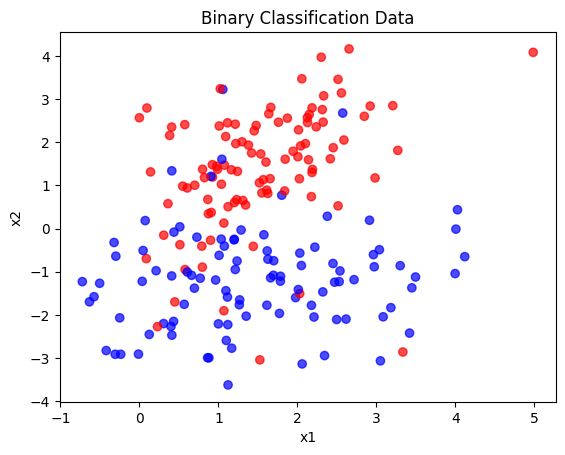

In [12]:
# Scatter plot of data
plt.scatter(df["x1"], df["x2"], c=df["y"], cmap="bwr", alpha=0.7)
plt.title("Binary Classification Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [ ]:
# Train logistic regression using our implementation
X = df[["x1", "x2"]].values
y = df["y"].values.reshape(-1,1)
weights, bias = train(X, y, learning_rate=0.1, epochs=1000)


Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.3814
Epoch 200: Loss = 0.3795
Epoch 300: Loss = 0.3789
Epoch 400: Loss = 0.3786
Epoch 500: Loss = 0.3785
Epoch 600: Loss = 0.3784
Epoch 700: Loss = 0.3784
Epoch 800: Loss = 0.3783
Epoch 900: Loss = 0.3783


In [38]:
# Predicting labels using our model
y_pred_labels = classify(X, weights, bias)

# Accuracy
accuracy = np.mean(y_pred_labels == y)
print(f"Custom Logistic Regression Accuracy: {accuracy:.2f}")


Custom Logistic Regression Accuracy: 0.88


In [41]:
# Comparing with sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logreg = LogisticRegression()
logreg.fit(X, y.ravel()) # ravel is used to flatten the dataframe 

y_pred_sklearn = logreg.predict(X)

acc_sklearn = accuracy_score(y, y_pred_sklearn)
print(f"Scikit-learn Logistic Regression Accuracy: {acc_sklearn:.2f}")

print("Classification_report of sklearn: ")
print(classification_report(y, y_pred_sklearn))



Scikit-learn Logistic Regression Accuracy: 0.88
Classification_report of sklearn: 
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        99
           1       0.89      0.87      0.88       101

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



In [42]:
print("Classification_report of our model: ")
print(classification_report(y, y_pred_labels))

Classification_report of our model: 
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        99
           1       0.89      0.87      0.88       101

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

